In [1]:
from sklearn import datasets
import pandas as pd

In [2]:
books_ds = pd.read_csv('books_dataset_v5_titlefixed_titleinfo.csv')

from sklearn.model_selection import train_test_split

X = books_ds[['Number of Pages', 'Subject Place', 'Subject', 'publisher_id', 'publishplace_id', 'dewey_id', 'publisher_freq', 'publish_place_freq', 'dewey_freq', 'author_id', 'author_frequency', 'title_avg_word_len', 'title_num_words']]
#removed publish date
y = books_ds['on_NYT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9827790973871734


In [3]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1194,   11],
       [  18,  461]], dtype=int64)

In [6]:
feature_imp = pd.Series(clf.feature_importances_, index=['num_pages', 'subject_place_score', 'subject_score', 'publisher_id', 'publishplace_id', 'dewey_id', 'publisher_freq', 'publish_place_freq', 'dewey_freq', 'author_id', 'author_frequency', 'title_avg_word_len', 'title_num_words' ]).sort_values(ascending=False)

In [7]:
feature_imp

subject_score          0.302861
publisher_freq         0.209978
author_frequency       0.183955
dewey_freq             0.093093
dewey_id               0.049930
publisher_id           0.048432
num_pages              0.038660
publishplace_id        0.017514
author_id              0.016030
publish_place_freq     0.011857
title_avg_word_len     0.010435
title_num_words        0.010353
subject_place_score    0.006902
dtype: float64

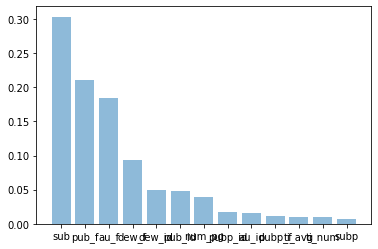

In [10]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = ['sub', 'pub_f', 'au_f', 'dew_f', 'dew_id', 'pub_id', 'num_pg', 'pubp_id', 'au_id', 'pubp_f', 'ti_avg', 'ti_num', 'subp']
y = [0.302861, 0.209978, 0.183955, 0.093093, 0.049930, 0.048432, 0.038660, 0.017514, 0.016030, 0.011857, 0.010435, 0.010353, 0.006902]

plt.bar(x, y, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.show()